<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Build-a-base-model-first-with-logistic-regression." data-toc-modified-id="Build-a-base-model-first-with-logistic-regression.-1">Build a base model first with logistic regression.</a></span><ul class="toc-item"><li><span><a href="#Delete-redundant-columns" data-toc-modified-id="Delete-redundant-columns-1.1">Delete redundant columns</a></span></li></ul></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2">Train-Test split</a></span></li><li><span><a href="#Categorical-Encoding" data-toc-modified-id="Categorical-Encoding-3">Categorical Encoding</a></span></li><li><span><a href="#Standardization-of-the-features" data-toc-modified-id="Standardization-of-the-features-4">Standardization of the features</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-5.1">Model</a></span></li><li><span><a href="#Performance-on-train-data" data-toc-modified-id="Performance-on-train-data-5.2">Performance on train data</a></span></li><li><span><a href="#Performance-on-test-set" data-toc-modified-id="Performance-on-test-set-5.3">Performance on test set</a></span></li><li><span><a href="#Learning-Curve" data-toc-modified-id="Learning-Curve-5.4">Learning Curve</a></span></li></ul></li><li><span><a href="#Logistic-regression-CV" data-toc-modified-id="Logistic-regression-CV-6">Logistic regression CV</a></span><ul class="toc-item"><li><span><a href="#Train-set-performance" data-toc-modified-id="Train-set-performance-6.1">Train set performance</a></span><ul class="toc-item"><li><span><a href="#precision-recall-curve" data-toc-modified-id="precision-recall-curve-6.1.1">precision-recall curve</a></span></li></ul></li><li><span><a href="#Test-data-performance" data-toc-modified-id="Test-data-performance-6.2">Test data performance</a></span><ul class="toc-item"><li><span><a href="#roc_curve" data-toc-modified-id="roc_curve-6.2.1">roc_curve</a></span></li><li><span><a href="#precision-recall-curve" data-toc-modified-id="precision-recall-curve-6.2.2">precision-recall curve</a></span></li></ul></li></ul></li><li><span><a href="#Merging-prediction-with-the-test-set" data-toc-modified-id="Merging-prediction-with-the-test-set-7">Merging prediction with the test set</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-8">Hyperparameter tuning</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-9">Grid Search</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-9.1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#roc-curve" data-toc-modified-id="roc-curve-9.1.1">roc curve</a></span></li><li><span><a href="#Merge-the-prediction-with-test-data" data-toc-modified-id="Merge-the-prediction-with-test-data-9.1.2">Merge the prediction with test data</a></span></li></ul></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-9.2">RandomForestClassifier</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer
from matplotlib import style

## Build a base model first with logistic regression.
    All other non-linear models must be better than the best LR model.
  
    

In [2]:
df = pd.read_csv('../dataset/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            356 non-null    object 
 1   album             356 non-null    object 
 2   track_name        356 non-null    object 
 3   track_id          356 non-null    object 
 4   popularity        356 non-null    int64  
 5   danceability      356 non-null    float64
 6   energy            356 non-null    float64
 7   key               356 non-null    int64  
 8   loudness          356 non-null    float64
 9   mode              356 non-null    int64  
 10  speechiness       356 non-null    float64
 11  acousticness      356 non-null    float64
 12  instrumentalness  356 non-null    float64
 13  liveness          356 non-null    float64
 14  valence           356 non-null    float64
 15  tempo             356 non-null    float64
 16  duration_ms       356 non-null    int64  
 1

### Delete redundant columns

In [4]:
df.head()

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,Evol Intent,Amazing Friends,Broken Sword,5YJIHyYOLHhxSNXaEQta4c,0,0.351,0.999,1,-3.208,1,0.0874,0.000253,0.835000,0.301,0.340,114.711,361693,5,0
1,Vishal-Shekhar,I Hate Luv Storys (Original Motion Picture Sou...,Bahara,1gwO79MdYdumgIjxq8eCxB,56,0.456,0.739,5,-6.733,1,0.0402,0.071800,0.000007,0.134,0.720,85.773,325707,4,1
2,Pritam,Chhichhore,Khairiyat (Bonus Track),3oM90C4SZLYzVZJEZD5EQk,58,0.606,0.654,0,-5.625,0,0.0365,0.484000,0.000001,0.152,0.597,124.972,270707,4,1
3,ILS,Bohemia,Feed The Addiction,23AUyZevDLz3pwkICwIJa0,0,0.585,0.887,1,-6.485,1,0.0422,0.000171,0.813000,0.554,0.212,134.884,278280,4,1
4,Amaal Mallik,M.S.Dhoni - The Untold Story,Phir Kabhi,4jk4CaqBMBbMZhf3PuR1ai,57,0.405,0.665,4,-5.498,1,0.0328,0.614000,0.000000,0.525,0.404,81.921,287422,4,1


In [5]:
df.shape

(356, 19)

In [6]:
df.drop(['track_name', 'track_id'], axis = 1, inplace = True)

In [7]:
y = df['target']

## Train-Test split

In [8]:
train, test, train_y, test_y = train_test_split(df.drop('target', axis = 1), 
                                                    y, train_size = 0.8, random_state = 1)

## Categorical Encoding

In [9]:
perm = np.random.permutation(len(train)) 
train = train.iloc[perm].reset_index(drop=True) 
train_y = train_y.iloc[perm].reset_index(drop=True)
test.reset_index(drop = True, inplace=True)
test_y.reset_index(drop = True, inplace = True)

In [10]:
cbe = CatBoostEncoder(cols=['artist', 'album'])
cbe.fit(train, train_y)
X_train = cbe.transform(train)
X_test = cbe.transform(test)

C:\Users\blahb\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Standardization of the features
    Apply StandardScaler to the numerical features

In [11]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

### Model

In [13]:
model = LogisticRegression(random_state=10).fit(X_train, train_y)

In [14]:
y_train_pred = pd.Series(model.predict(X_train))

In [15]:
fpr, tpr, threshold = roc_curve(train_y, y_train_pred)

### Performance on train data

In [16]:
tn, fp, fn, tp = confusion_matrix(train_y, y_train_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print("False Positive rate: ", fpr)
print("True Positive rate: ", tpr)
print("AUCROC Train:", round(roc_auc_score(train_y, y_train_pred), 2))
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print('Train Accuracy: ', round(model.score(X_train, train_y)))
#grid_fit.score(X_test, test_y)

False Positive rate:  [0.        0.3559322 1.       ]
True Positive rate:  [0.        0.8373494 1.       ]
AUCROC Train: 0.74
Recall: 0.84
Precision: 0.77
Train Accuracy:  1.0


### Performance on test set

In [17]:
y_test_pred = pd.Series(model.predict(X_test))

In [18]:
tn, fp, fn, tp = confusion_matrix(test_y, y_test_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print("Recall:", round(recall, 2))
print("Precision:", round(precision, 2))
print("AUCROC Test:", round(roc_auc_score(test_y, y_test_pred), 2))
print('Test Accuracy: ', round(model.score(X_test, test_y)), 2)

Recall: 0.87
Precision: 0.61
AUCROC Test: 0.63
Test Accuracy:  1.0 2


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

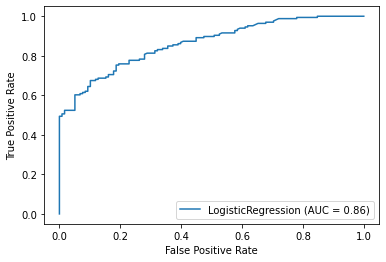

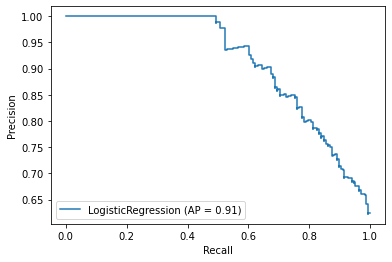

In [20]:
roc_display = plot_roc_curve(model, X_train, train_y)
pr_display = plot_precision_recall_curve(model, X_train, train_y)
style.use("ggplot")
plt.savefig('1.png')

In [21]:
from sklearn.metrics import roc_curve, auc

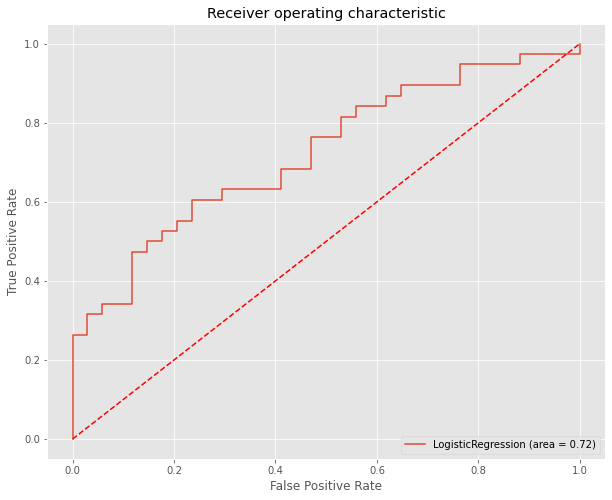

In [22]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='LogisticRegression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('2.png')
plt.show()

### Learning Curve

In [23]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [24]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 10))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

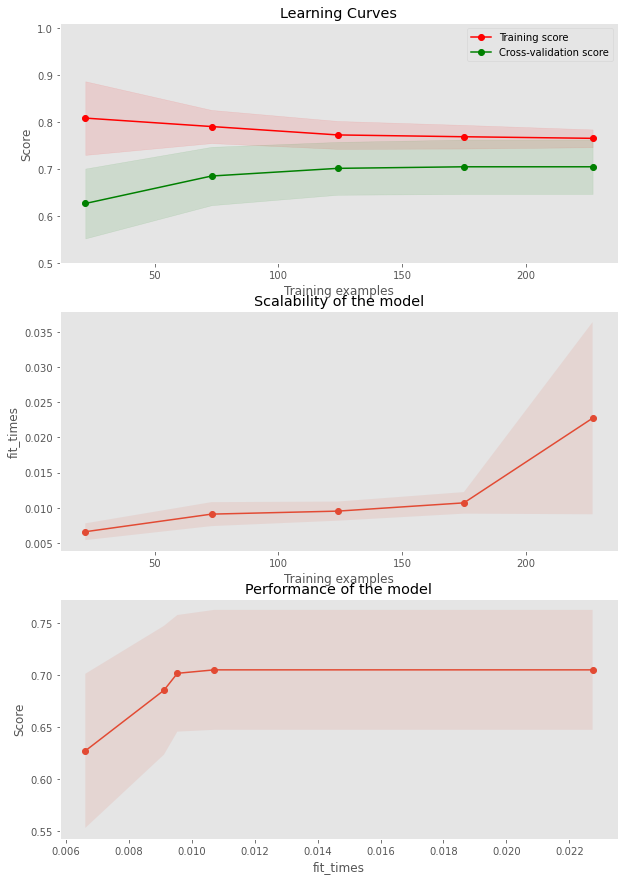

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, train_y, axes=axes[:], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
style.use("ggplot")
plt.savefig('3.png')
plt.show()

## Logistic regression CV

In [26]:
cv_model = LogisticRegressionCV(cv = 10, random_state = 10).fit(X_train, train_y)

### Train set performance

In [27]:
y_train_pred_cv = pd.Series(cv_model.predict(X_train))
tn, fp, fn, tp = confusion_matrix(train_y, y_train_pred_cv).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)

print("AUCROC Train:", round(roc_auc_score(train_y, y_train_pred_cv), 2))
print("Recall Train:", round(recall, 2))
print("Precision Train:", round(precision, 2))
print("Train Accuracy: ", round(cv_model.score(X_train, train_y), 2))

AUCROC Train: 0.76
Recall Train: 0.83
Precision Train: 0.8
Train Accuracy:  0.77


#### precision-recall curve

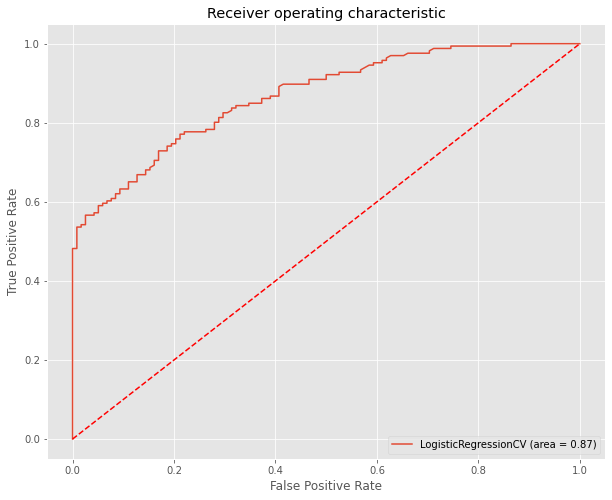

In [28]:
probs = cv_model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(train_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='LogisticRegressionCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('4.png')
plt.show()

### Test data performance

In [29]:
y_test_pred_cv = pd.Series(cv_model.predict(X_test))
tn, fp, fn, tp = confusion_matrix(test_y, y_test_pred_cv).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)

print("AUCROC Test:", round(roc_auc_score(test_y, y_test_pred_cv), 2))
print("Recall Test:", round(recall, 2))
print("Precision Test:", round(precision, 2))
print("Train Accuracy: ", round(cv_model.score(X_test, test_y), 2))

AUCROC Test: 0.63
Recall Test: 0.82
Precision Test: 0.62
Train Accuracy:  0.64


#### roc_curve

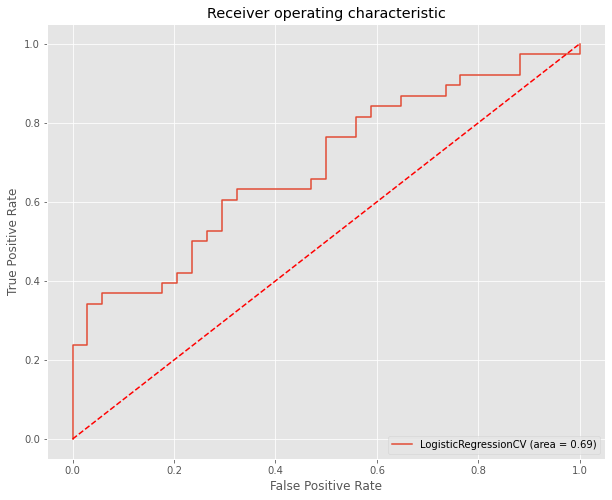

In [30]:
probs = cv_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='LogisticRegressionCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('5.png')
plt.show()

#### precision-recall curve

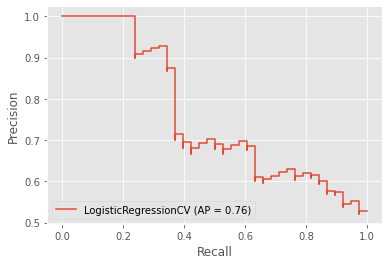

In [31]:
precision_recall = plot_precision_recall_curve(cv_model, X_test, test_y)
style.use("ggplot")
plt.savefig('6.png')

## Merging prediction with the test set

In [32]:
test['LR_CV_prediction'] = y_test_pred_cv
train['LR_CV_prediction'] = y_train_pred_cv

In [33]:
X_train = train.loc[:, train.columns != 'LR_CV_prediction'].copy()
X_test = test.loc[:, test.columns != 'LR_CV_prediction'].copy()

## Hyperparameter tuning

In [34]:
preprocessing_pipe = Pipeline([('encoder', CatBoostEncoder(cols=['artist', 'album'])), 
          ('standardize', MinMaxScaler())])

In [35]:
preprocessing_fit = preprocessing_pipe.fit(X_train, train_y)

C:\Users\blahb\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
X_train = preprocessing_fit.transform(X_train)
X_test = preprocessing_fit.transform(X_test)

In [37]:
pipe = Pipeline([('classifier', LogisticRegression())])

## Grid Search

### Logistic Regression

In [38]:
param_grid = {
    'classifier': [LogisticRegression()],
    'classifier__penalty' : ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear']
}

In [39]:
grid = GridSearchCV(pipe, param_grid, cv = 10, verbose = True)

In [40]:
grid_fit = grid.fit(X_train, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.7s finished


In [66]:
grid_fit.best_params_

{'classifier': LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear'),
 'classifier__C': 78.47599703514607,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [41]:
y_train_pred = pd.Series(grid_fit.predict(X_train))
tn, fp, fn, tp = confusion_matrix(train_y, y_train_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)

print("AUCROC Train:", round(roc_auc_score(train_y, y_train_pred), 2))
print("Recall Train:", round(recall, 2))
print("Precision Train:", round(precision, 2))
print("Train accuracy: ", round(grid_fit.score(X_train, train_y), 2))

AUCROC Train: 0.76
Recall Train: 0.82
Precision Train: 0.8
Train accuracy:  0.77


In [42]:
y_test_pred = pd.Series(grid_fit.predict(X_test))
tn, fp, fn, tp = confusion_matrix(test_y, y_test_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)

print("AUCROC Test:", round(roc_auc_score(test_y, y_test_pred), 3))
print("Recall Test:", round(recall, 3))
print("Precision Test:", round(precision, 3))
print("Test Accuracy: ", round(grid_fit.score(X_test, test_y), 2))

AUCROC Test: 0.601
Recall Test: 0.789
Precision Test: 0.6
Test Accuracy:  0.61


#### roc curve

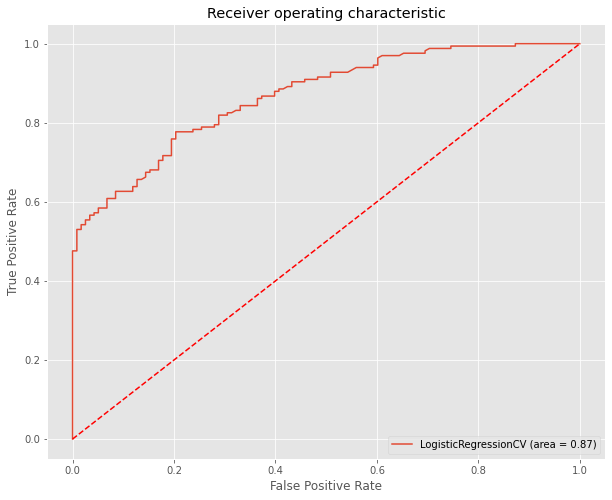

In [43]:
probs = grid_fit.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(train_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='LogisticRegressionCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('7.png')
plt.show()

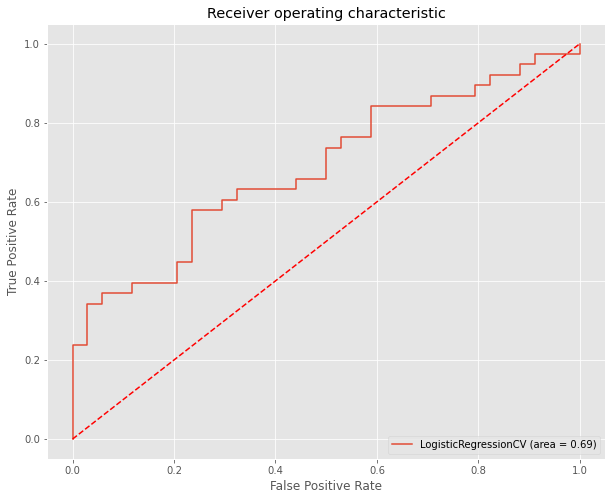

In [44]:
#roc_curve = plot_roc_curve(grid_fit, test, test_y)
probs = grid_fit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='LogisticRegressionCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('8.png')
plt.show()

In [45]:
classes = grid_fit.predict(X_test)
print(classification_report(classes, test_y))

              precision    recall  f1-score   support

           0       0.41      0.64      0.50        22
           1       0.79      0.60      0.68        50

    accuracy                           0.61        72
   macro avg       0.60      0.62      0.59        72
weighted avg       0.67      0.61      0.63        72



#### Merge the prediction with test data

In [46]:
test['LR_GridCV_prediction'] = y_test_pred

### RandomForestClassifier

In [47]:
param_grid = {
    'n_estimators': np.arange(100, 300, 50),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(10, 100, 20),
    'min_samples_leaf': np.arange(5, 20, 5),
    'min_impurity_decrease': np.linspace(0, 2, 10).round(2)
}

In [48]:
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'auc':make_scorer(metrics.roc_auc_score),
           'recall': make_scorer(metrics.recall_score), 'precision': make_scorer(metrics.precision_score)}

In [49]:
rf_model = GridSearchCV(RandomForestClassifier(warm_start = True), param_grid = param_grid, 
                      scoring = scoring, verbose = True, return_train_score = True, 
                       cv = 5, refit = 'auc', n_jobs = -1)

In [55]:
rf_model = rf_model.fit(X_train, train_y)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  9.9min finished


    This cell is to avoid having to always execute the grid fitting cet (above).
    The model we are loading below if when you'hv already run the gridsearchcv once. 
    and the model has been saved into file.

In [50]:
rf_model = pickle.load(open('../saved_models/random_forest_grid_model.pkl', 'rb'))

In [51]:
rf_model.best_params_

{'criterion': 'gini',
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 100}

In [52]:
results = rf_model.cv_results_

In [67]:
for scorer in sorted(scoring):
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]
    score = results['mean_train_%s' % scorer][best_index]
    print("mean_test_%s : %s" % (scorer, round(best_score, 2)))
    print("mean_train_%s : %s" % (scorer, round(score, 2)))

mean_test_accuracy : 0.75
mean_train_accuracy : 0.87
mean_test_auc : 0.75
mean_train_auc : 0.88
mean_test_precision : 0.81
mean_train_precision : 0.91
mean_test_recall : 1.0
mean_train_recall : 1.0


In [59]:
pickle.dump(rf_grid, open("../saved_models/random_forest_grid_model.pkl", 'wb'))

In [54]:
rf_model = pickle.load(open('../saved_models/random_forest_grid_model.pkl', 'rb'))

In [55]:
temp = rf_model.cv_results_

In [56]:
classes = rf_model.predict(X_test)
print(classification_report(classes, test_y))

              precision    recall  f1-score   support

           0       0.59      0.69      0.63        29
           1       0.76      0.67      0.72        43

    accuracy                           0.68        72
   macro avg       0.68      0.68      0.68        72
weighted avg       0.69      0.68      0.68        72



In [57]:
test['rf_cv_preds'] = classes

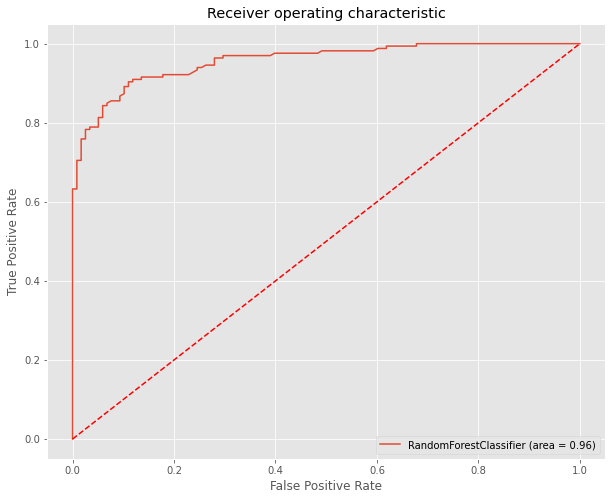

In [58]:
#rf_model.predict(X_test)
#roc_curve = plot_roc_curve(grid_fit, test, test_y)
probs = rf_model.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(train_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('9.png')
plt.show()

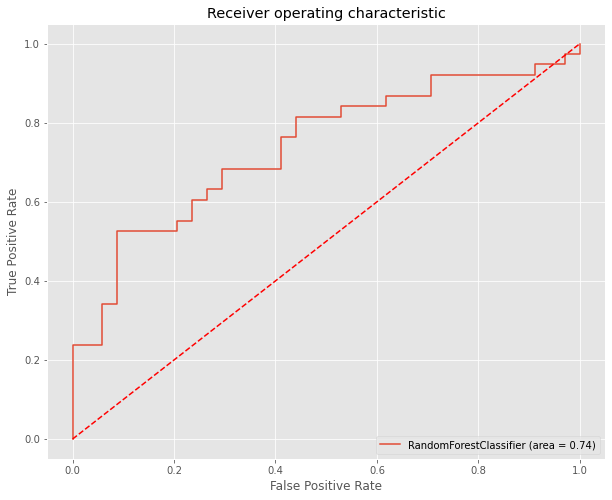

In [59]:
#rf_model.predict(X_test)
#roc_curve = plot_roc_curve(grid_fit, test, test_y)
probs = rf_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
style.use("ggplot")
plt.savefig('10.png')
plt.show()

In [60]:
train.drop('LR_CV_prediction', axis = 1, inplace = True)

In [61]:
feature_importances = {train.columns[i]:rf_model.best_estimator_.feature_importances_[i]*100 for i in range(len(train.columns))}
feature_importances = pd.Series(feature_importances).sort_values(ascending = False)

In [62]:
feature_importances

artist              23.164339
album               17.560690
danceability         9.198839
instrumentalness     8.270338
energy               6.421282
speechiness          5.233093
loudness             4.994592
valence              4.823237
acousticness         4.733295
popularity           4.647159
duration_ms          3.868242
liveness             2.782225
tempo                2.439554
key                  1.545773
mode                 0.317342
time_signature       0.000000
dtype: float64

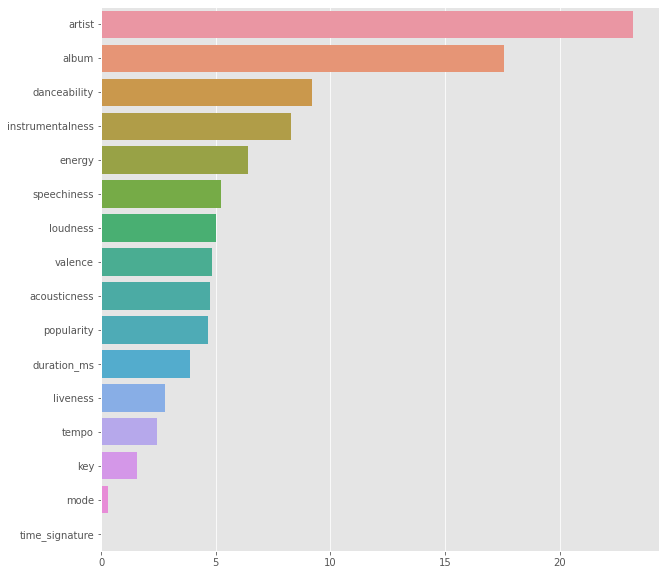

In [63]:
plt.figure(figsize = (10, 10))
sns.barplot(y = feature_importances.index, x = feature_importances.values, orient = 'h', )
style.use("ggplot")
plt.savefig('11.png')
plt.show()

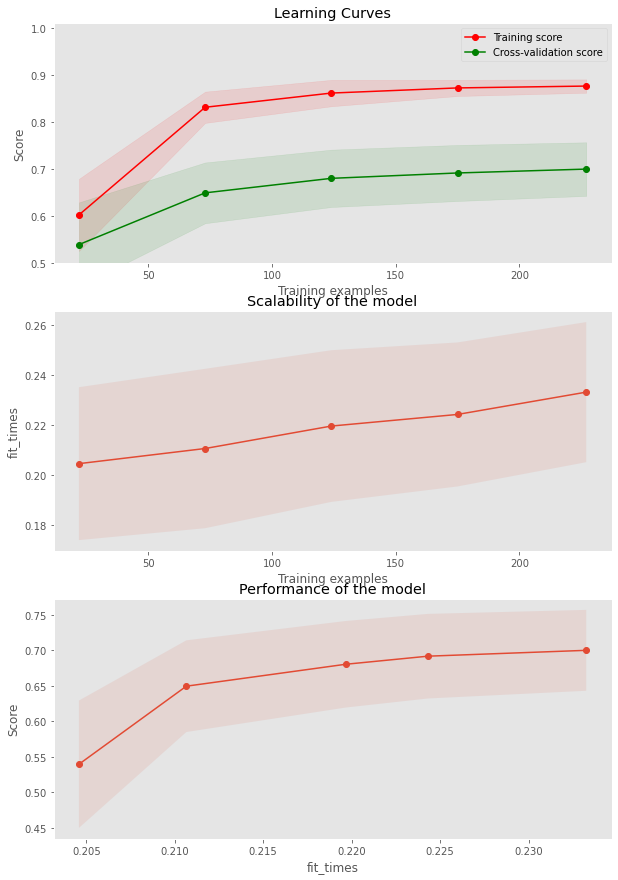

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = rf_model.best_estimator_
plot_learning_curve(estimator, title, X_train, train_y, axes=axes[:], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
style.use("ggplot")
plt.savefig('12.png')
plt.show()

    Generate prediction on test set (DONE).
    Generate the classification report and inspect it for overfitting (DONE)
    plot AUCROC curve(DONE)
    Merge rf prediction with test data and inspect it(DONE).